# Advanced Sarimax Usage
If you are not a magician who can easily infer correct SARIMAX orders from looking on PACF (partial autocorrelation function) and ACF (autocorrelation function), you want to rather leverage AutoSarima which finds them for you - set `init_with_autoarima` to True. 

If you want to further configure the search space of AutoARIMA, then you can provide all parameters of pmdarima.arima.AutoARIMA as `autoarima_dict` arguments.

When you run cross-validation with enabled AutoARIMA (`init_with_autoarima`), it's often advisable to find the correct order only during the first fit call and reuse this model on all other splits in order to simulate the out-of-sample performance.

The signature of SarimaxWrapper contains parameters of pmdarima.arima.ARIMA, not AutoARIMA class.

For more parameters check [pmdarima docs](http://alkaline-ml.com/pmdarima/)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [12, 6]

In [2]:
from hcrystalball.utils import get_sales_data

df = get_sales_data(n_dates=100, 
                    n_assortments=1, 
                    n_states=1, 
                    n_stores=1)
X, y = pd.DataFrame(index=df.index), df['Sales']

In [3]:
from hcrystalball.wrappers import SarimaxWrapper

In [4]:
SarimaxWrapper?

Init signature:
SarimaxWrapper(
    order=None,
    seasonal_order=(0, 0, 0, 0),
    start_params=None,
    method='lbfgs',
    maxiter=50,
    suppress_warnings=False,
    out_of_sample_size=0,
    scoring='mse',
    scoring_args=None,
    trend=None,
    with_intercept=True,
    name='sarimax',
    conf_int=False,
    init_with_autoarima=False,
    autoarima_dict=None,
    always_search_model=False,
    clip_predictions_lower=None,
    clip_predictions_upper=None,
)
Docstring:     
Wrapper for `pmdarima.arima.ARIMA` and `pmdarima.arima.AutoARIMA`

Search for optimal order of SARIMAX type model or instantiate one
in case you provide specific order.

Parameters
----------
name : str
    Name of the model instance, used also as column name for returned prediction.
    
conf_int: bool
    Whether confidence intervals should be also outputed.
    
init_with_autoarima: bool
    Whether you want to leverage automated search of pmdarima.arima.AutoARIMA.
    
autoarima_dict: dict
    If `init

In [5]:
model = SarimaxWrapper(
    autoarima_dict={'d':1, 'm':7, 'max_p':2, 'max_q':2}, 
    init_with_autoarima=True
)

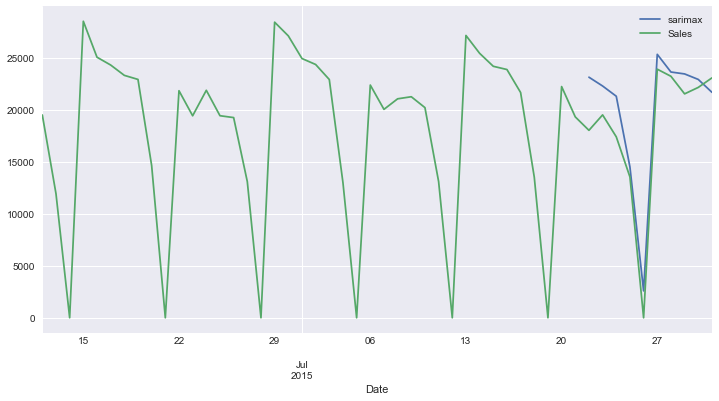

In [6]:
(model.fit(X[:-10], y[:-10])
      .predict(X[-10:])
      .merge(y, left_index=True, right_index=True, how='outer')
      .tail(50)
      .plot()
);

And now access the models parameters

In [7]:
model

SarimaxWrapper(always_search_model=False,
               autoarima_dict={'d': 1, 'm': 7, 'max_p': 2, 'max_q': 2},
               clip_predictions_lower=None, clip_predictions_upper=None,
               conf_int=False, init_with_autoarima=False, maxiter=50,
               method='lbfgs', name='sarimax', order=(2, 1, 2),
               out_of_sample_size=0, scoring='mse', scoring_args=None,
               seasonal_order=(2, 0, 1, 7), start_params=None,
               suppress_warnings=False, trend=None, with_intercept=True)

You might also directly pass the orders if you know, what are you doing

In [8]:
model = SarimaxWrapper(order=(1, 1, 2), seasonal_order=(1, 0, 2, 7))

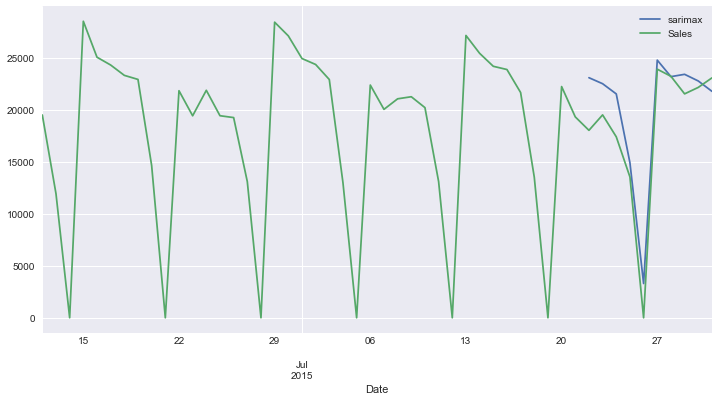

In [9]:
(model.fit(X[:-10], y[:-10])
      .predict(X[-10:])
      .merge(y, left_index=True, right_index=True, how='outer')
      .tail(50)
      .plot()
);

In [10]:
model

SarimaxWrapper(always_search_model=False, autoarima_dict=None,
               clip_predictions_lower=None, clip_predictions_upper=None,
               conf_int=False, init_with_autoarima=False, maxiter=50,
               method='lbfgs', name='sarimax', order=(1, 1, 2),
               out_of_sample_size=0, scoring='mse', scoring_args=None,
               seasonal_order=(1, 0, 2, 7), start_params=None,
               suppress_warnings=False, trend=None, with_intercept=True)